In [5]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hoggorm as ho
import hoggormplot as hopl
np.bool = np.bool_
from sklearn.preprocessing import StandardScaler
from plotnine import ggplot, aes, labs, geom_point, geom_text

In [6]:
# Load the physical properties dataset
data = pd.read_excel(r"C:\Users\marth\OneDrive\Skole\Master\Data\murstein_labdata_v3.xlsx")

In [6]:
data

,Project ID,Brick ID,Type,Length mm,Width mm,Height mm,Volume cm3,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength Mpa,FR,Weight (group mean)
0,1,A1_1,M,221,106,66,1463,1920.000000,10.200000,0.720000,2.300000,406,17.3,0.568716,3.04
1,1,A2_1,M,221,106,66,1477,1950.000000,9.500000,0.710000,2.100000,523,22.3,0.527635,3.04
2,1,A3_1,M,221,111,66,1469,1938.000000,9.700000,0.720000,2.200000,513,21.9,0.551049,3.04
3,1,B1_1,M,233,113,61,1510,1882.000000,13.000000,0.990000,1.900000,1998,80.9,0.725091,3.04
4,1,B2_1,M,228,106,57,1324,2135.000000,6.800000,0.950000,1.100000,1945,80.5,0.466683,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,9,TP6,H,227,105,61,1077,2103.342618,7.323533,0.761708,0.847493,1571,66.0,0.333385,2.20
59,9,TP7,H,227,105,60,1015,2157.832512,6.711716,0.785256,0.537025,1202,50.0,0.266680,2.20
60,9,TP8,H,227,105,61,1015,2143.054187,7.006252,0.791688,0.654500,1623,68.0,0.298866,2.20
61,9,TP9,H,228,107,61,1024,2096.582031,7.457264,0.791790,0.573865,1178,48.0,0.286090,2.20


In [7]:
# Retrieve only the integer datavalues, for correlation matrix
int_data = data.iloc[:,3:]

# Remove highly correlated variables
int_data = int_data.drop(labels=["Volume cm3", "Weight (group mean)", "Height mm", "Length mm", "Width mm"], axis=1)

In [8]:
int_data

,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength Mpa,FR
0,1920.000000,10.200000,0.720000,2.300000,406,17.3,0.568716
1,1950.000000,9.500000,0.710000,2.100000,523,22.3,0.527635
2,1938.000000,9.700000,0.720000,2.200000,513,21.9,0.551049
3,1882.000000,13.000000,0.990000,1.900000,1998,80.9,0.725091
4,2135.000000,6.800000,0.950000,1.100000,1945,80.5,0.466683
...,...,...,...,...,...,...,...
58,2103.342618,7.323533,0.761708,0.847493,1571,66.0,0.333385
59,2157.832512,6.711716,0.785256,0.537025,1202,50.0,0.266680
60,2143.054187,7.006252,0.791688,0.654500,1623,68.0,0.298866
61,2096.582031,7.457264,0.791790,0.573865,1178,48.0,0.286090


In [14]:
int_data.rename(columns={'Max force kN': 'Max force'}, inplace=True)
int_data.rename(columns={'Compressive strength MPa': 'Comp.strength'}, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

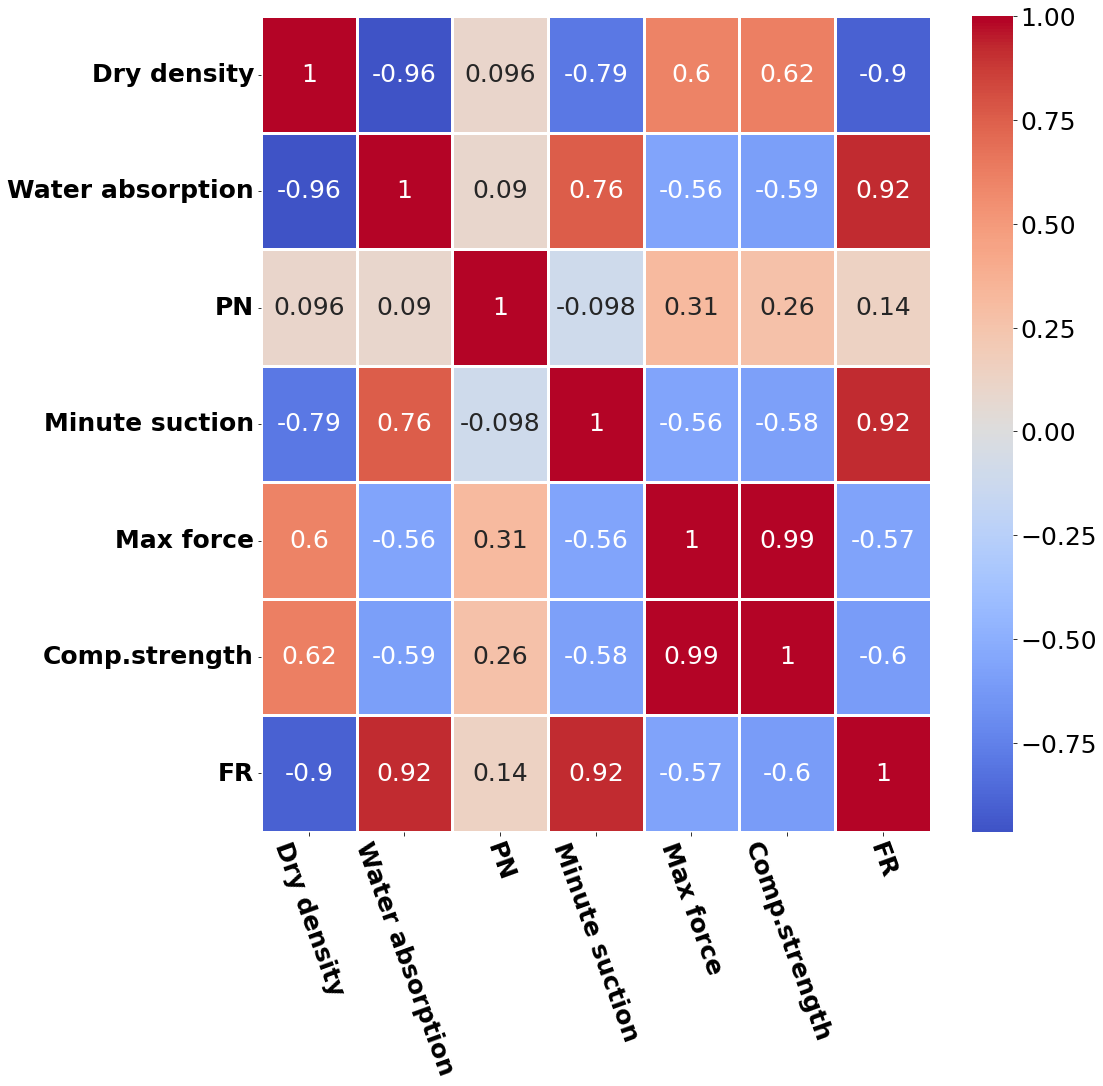

In [15]:
# Check out correlation betwee features:
corr = int_data.corr()

# Make heatmap of correlation 
#plt.figure(figsize=(15,15))
#sns.heatmap(corr, annot=True, cmap="coolwarm",center=0, linewidth=2, linecolor="white", annot_kws={"fontsize":15})
#plt.title("Correlation matrix - Both solid and perforated brick", fontsize=22)
#plt.xticks(rotation = 25, fontsize= 15)
#plt.yticks(rotation=25, fontsize=15)

# Make heatmap of correlation 
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm",center=0, linewidth=2.5, linecolor="white", annot_kws={"fontsize":25})
plt.xticks(rotation = -70, fontsize= 25, fontweight="bold")
plt.yticks(rotation = 0, fontsize=25, fontweight="bold")

# Adjust colorbar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)

plt.show

In [ ]:
# Standardize the data together
sc = StandardScaler()
sc.fit(int_data)
df_sc = pd.DataFrame(sc.fit_transform(int_data),columns = int_data.columns)
df_sc

In [5]:
# Get the values from the data frame
data_vals= df_sc.values
#Get column names
col_names = list(df_sc.columns)
# Get the id's of each brick
row_names = list(data["Brick ID"])
# Get the types of brick
types = list(data["Type"])
#group_names = np.unique(list(data["Project ID"]))
# Get a list of all the project ID's, not unique
project_ids = list(data["Project ID"])

In [6]:
# Make new standardized dataframe with brick ID's and project ID's. 
#d=row_names+project_ids+types+data_vals
df_sc['Brick ID'] = row_names
df_sc['Type'] = types
df_sc['Project ID'] = project_ids

In [13]:
df_sc

,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength Mpa,FR,Brick ID,Type,Project ID
0,-0.006809,-0.250127,-0.872119,0.267764,-1.485172,-1.341981,-0.009236,A1_1,M,1
1,0.120276,-0.373363,-0.967231,0.138163,-1.321761,-1.188185,-0.151253,A2_1,M,1
2,0.069442,-0.338153,-0.872119,0.202963,-1.335728,-1.200489,-0.070310,A3_1,M,1
3,-0.167784,0.242815,1.695902,0.008562,0.738329,0.614306,0.531354,B1_1,M,1
4,0.903967,-0.848701,1.315455,-0.509840,0.664306,0.602002,-0.361963,B2_1,M,1
...,...,...,...,...,...,...,...,...,...,...
58,0.769861,-0.756532,-0.475426,-0.673465,0.141951,0.155993,-0.822773,TP6,H,9
59,1.000689,-0.864243,-0.251453,-0.874649,-0.373421,-0.336154,-1.053373,TP7,H,9
60,0.938086,-0.812390,-0.190278,-0.798526,0.214578,0.217512,-0.942109,TP8,H,9
61,0.741222,-0.732989,-0.189308,-0.850777,-0.406941,-0.397673,-0.986273,TP9,H,9


In [14]:
# Splitting the dataset into solid and perforated brick after standardization
solid = df_sc[df_sc['Type'] == 'M']
perf = df_sc[df_sc['Type'] == 'H']

## Plotting seperate boxplots

Comparing the values of perforated and solid brick

Dry density                    Axes(0.125,0.657941;0.0731132x0.222059)
Water absorption            Axes(0.212736,0.657941;0.0731132x0.222059)
PN                          Axes(0.300472,0.657941;0.0731132x0.222059)
Minute suction              Axes(0.388208,0.657941;0.0731132x0.222059)
Max force kN                Axes(0.475943,0.657941;0.0731132x0.222059)
Compressive strength Mpa    Axes(0.563679,0.657941;0.0731132x0.222059)
FR                          Axes(0.651415,0.657941;0.0731132x0.222059)
Project ID                  Axes(0.739151,0.657941;0.0731132x0.222059)
dtype: object

<Figure size 432x288 with 0 Axes>

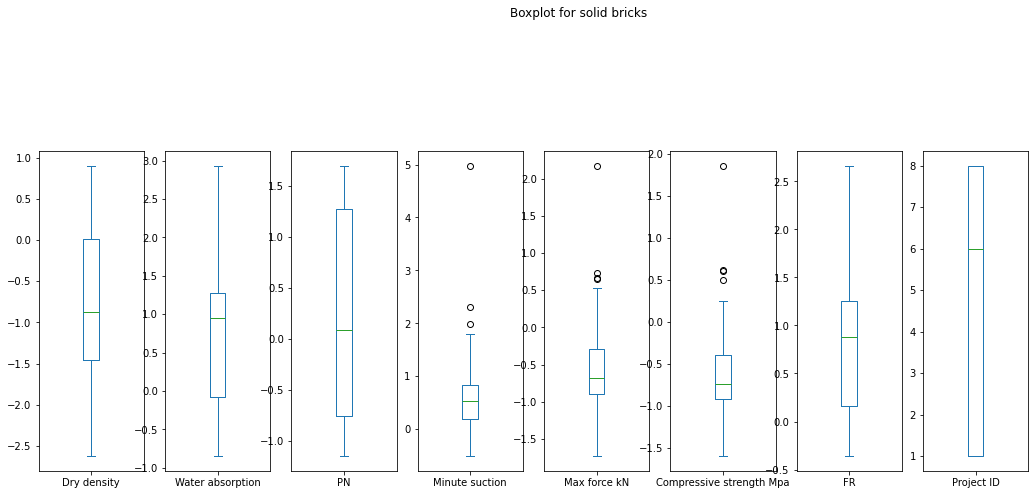

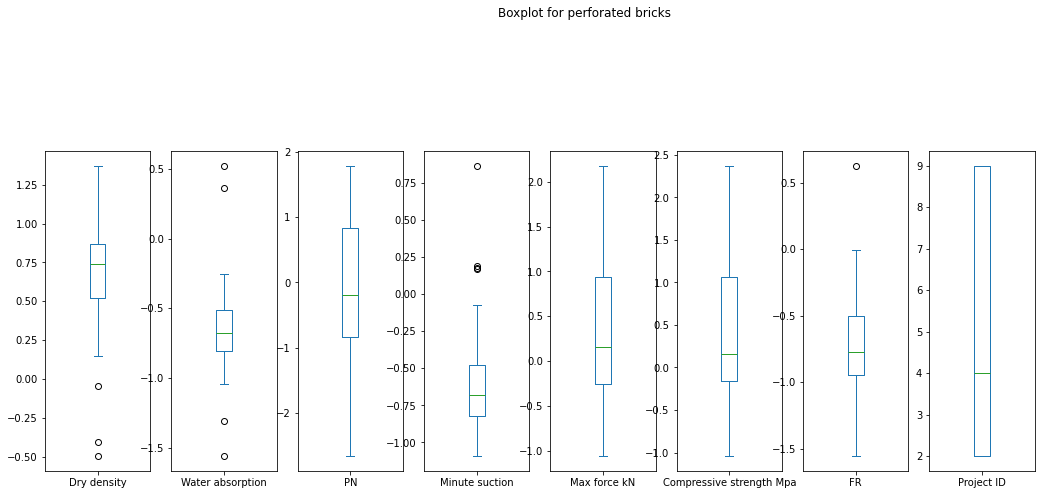

In [15]:
plt.figure()
solid.plot(kind='box', 
             subplots=True, 
             layout=(3, 9), 
             sharex=False, 
             sharey=False,
             figsize=(20, 20),
             title="Boxplot for solid bricks")

perf.plot(kind='box', 
             subplots=True, 
             layout=(3, 9), 
             sharex=False, 
             sharey=False,
             figsize=(20, 20),
             title="Boxplot for perforated bricks")

## Violinplots

In [8]:
data1 = data.drop(labels=["Volume cm3", "Weight (group mean)", "Height mm", "Length mm", "Width mm"], axis=1)
data1

,Project ID,Brick ID,Type,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength Mpa,FR
0,1,A1_1,M,1920.000000,10.200000,0.720000,2.300000,406,17.3,0.568716
1,1,A2_1,M,1950.000000,9.500000,0.710000,2.100000,523,22.3,0.527635
2,1,A3_1,M,1938.000000,9.700000,0.720000,2.200000,513,21.9,0.551049
3,1,B1_1,M,1882.000000,13.000000,0.990000,1.900000,1998,80.9,0.725091
4,1,B2_1,M,2135.000000,6.800000,0.950000,1.100000,1945,80.5,0.466683
...,...,...,...,...,...,...,...,...,...,...
58,9,TP6,H,2103.342618,7.323533,0.761708,0.847493,1571,66.0,0.333385
59,9,TP7,H,2157.832512,6.711716,0.785256,0.537025,1202,50.0,0.266680
60,9,TP8,H,2143.054187,7.006252,0.791688,0.654500,1623,68.0,0.298866
61,9,TP9,H,2096.582031,7.457264,0.791790,0.573865,1178,48.0,0.286090


In [17]:
solid = data1[data1['Type'] == 'M']
perf = data1[data1['Type'] == 'H']

In [15]:
solid

,Project ID,Brick ID,Type,Dry density,Water absorption,po,Minute suction,Max force kN,Compressive strength Mpa,FR
0,1,A1_1,M,1920.000000,10.200000,0.720000,2.300000,406,17.3,0.568716
1,1,A2_1,M,1950.000000,9.500000,0.710000,2.100000,523,22.3,0.527635
2,1,A3_1,M,1938.000000,9.700000,0.720000,2.200000,513,21.9,0.551049
3,1,B1_1,M,1882.000000,13.000000,0.990000,1.900000,1998,80.9,0.725091
4,1,B2_1,M,2135.000000,6.800000,0.950000,1.100000,1945,80.5,0.466683
5,1,B3_1,M,2094.000000,8.100000,0.980000,1.100000,3031,121.4,0.490847
6,1,C1_1,M,1784.000000,17.100000,0.970000,3.600000,1172,41.7,1.031640
7,1,C2_1,M,1847.000000,15.500000,0.930000,3.300000,1435,52.9,0.914688
8,1,C3_1,M,2009.000000,10.700000,0.910000,1.400000,1941,77.0,0.535951
9,1,D1_1,M,1768.000000,17.800000,0.960000,2.400000,1027,38.0,0.841191


C:\Users\marth\AppData\Local\Temp/ipykernel_10072/2127028318.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.


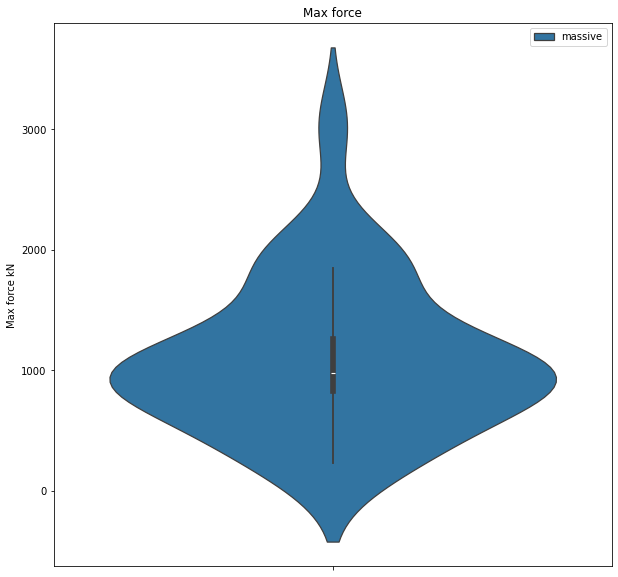

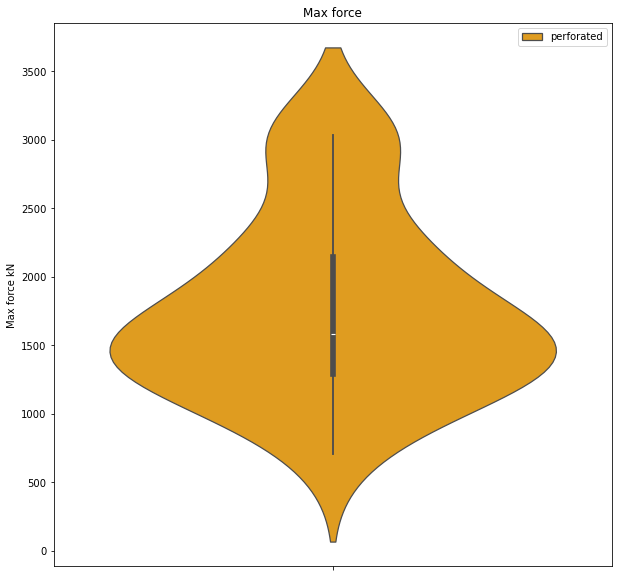

In [18]:
plt.figure(figsize=(10,10))
sns.violinplot(data=solid.iloc[:,7], density_norm="count", label="massive")
plt.title("Max force")
plt.legend()
plt.figure(figsize=(10,10))
sns.violinplot(data=perf.iloc[:,7], scale="count", label = "perforated", color="orange")
plt.title("Max force")
plt.legend()

In [15]:
data1.query('FR <= 0.30 & PN < 0.9')

,Project ID,Brick ID,Type,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength Mpa,FR
24,3,A3_3,H,2043.000000,8.400000,0.840000,0.300000,3030,138.1,0.225202
25,3,A4_3,H,2081.000000,6.400000,0.760000,0.400000,2960,133.6,0.230978
26,3,A5_3,H,2178.000000,4.200000,0.680000,0.200000,3030,130.6,0.139626
32,5,BB6,H,2084.032922,5.714624,0.610549,0.763702,1538,63.0,0.256022
35,5,BB9,H,2245.796848,2.748860,0.531674,0.260055,1458,63.0,0.120728
54,9,TP2,H,2129.681275,7.169582,0.794712,0.632702,1479,61.0,0.296821
57,9,TP5,H,2103.128055,7.413432,0.804743,0.564390,1412,58.0,0.287462
59,9,TP7,H,2157.832512,6.711716,0.785256,0.537025,1202,50.0,0.266680
60,9,TP8,H,2143.054187,7.006252,0.791688,0.654500,1623,68.0,0.298866
61,9,TP9,H,2096.582031,7.457264,0.791790,0.573865,1178,48.0,0.286090


In [18]:
data1[data1["Max force kN"] > 3000]

,Project ID,Brick ID,Type,Dry density,Water absorption,po,Minute suction,Max force kN,Compressive strength Mpa,FR
5,1,B3_1,M,2094.0,8.1,0.98,1.1,3031,121.4,0.490847
22,3,A1_3,H,2080.0,7.7,0.77,0.8,3030,138.1,0.331110
23,3,A2_3,H,1804.0,14.6,0.87,1.4,3030,129.3,0.570620
24,3,A3_3,H,2043.0,8.4,0.84,0.3,3030,138.1,0.225202
26,3,A5_3,H,2178.0,4.2,0.68,0.2,3030,130.6,0.139626
27,4,B1_3,H,1716.0,16.5,0.79,2.4,3031,121.9,0.713207
28,4,B2_3,H,1776.0,14.5,0.78,2.0,3030,136.9,0.621107
29,4,B3_3,H,1668.0,17.2,0.81,2.9,3031,136.9,0.826967


In [19]:
data1[data1["Compressive strength Mpa"] > 100]

,Project ID,Brick ID,Type,Dry density,Water absorption,po,Minute suction,Max force kN,Compressive strength Mpa,FR
5,1,B3_1,M,2094.0,8.1,0.98,1.1,3031,121.4,0.490847
14,2,S3_2,H,2164.0,7.0,0.90,0.7,2450,110.8,0.347964
15,2,S4_2,H,2090.0,9.0,0.90,1.2,2305,101.9,0.471723
22,3,A1_3,H,2080.0,7.7,0.77,0.8,3030,138.1,0.331110
23,3,A2_3,H,1804.0,14.6,0.87,1.4,3030,129.3,0.570620
24,3,A3_3,H,2043.0,8.4,0.84,0.3,3030,138.1,0.225202
25,3,A4_3,H,2081.0,6.4,0.76,0.4,2960,133.6,0.230978
26,3,A5_3,H,2178.0,4.2,0.68,0.2,3030,130.6,0.139626
27,4,B1_3,H,1716.0,16.5,0.79,2.4,3031,121.9,0.713207
28,4,B2_3,H,1776.0,14.5,0.78,2.0,3030,136.9,0.621107


C:\Users\marth\AppData\Local\Temp/ipykernel_3912/3600363791.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
C:\Users\marth\AppData\Local\Temp/ipykernel_3912/3600363791.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.


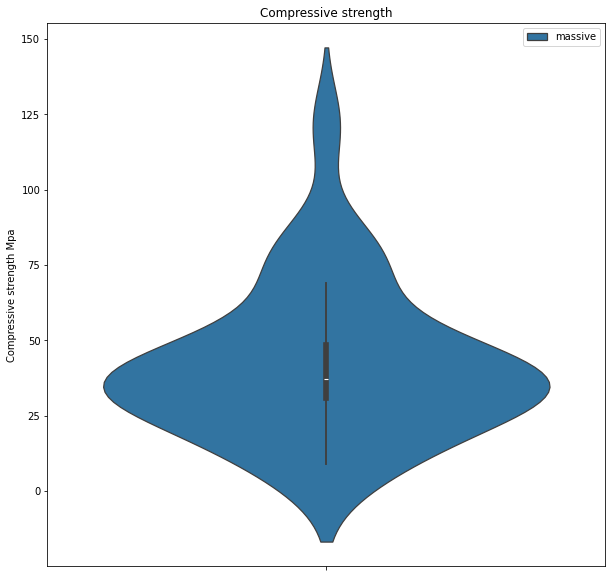

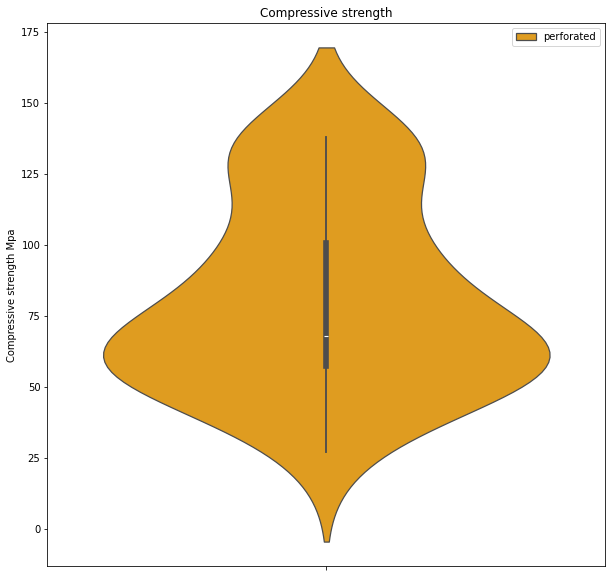

In [20]:

plt.figure(figsize=(10,10))
sns.violinplot(data=solid.iloc[:,8], scale="count", label="massive")
plt.title("Compressive strength")
plt.legend()
plt.figure(figsize=(10,10))
sns.violinplot(data=perf.iloc[:,8], scale="count", label = "perforated", color="orange")
plt.title("Compressive strength")
plt.legend()

C:\Users\marth\AppData\Local\Temp/ipykernel_3912/2673213086.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
C:\Users\marth\AppData\Local\Temp/ipykernel_3912/2673213086.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.


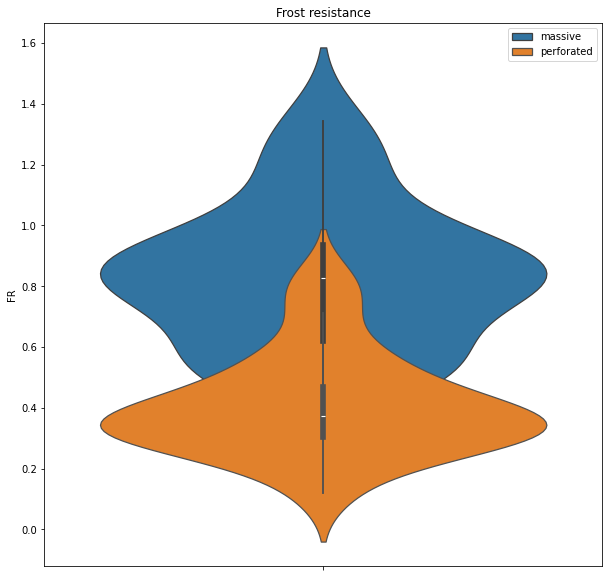

In [21]:
plt.figure(figsize=(10,10))
sns.violinplot(data=solid.iloc[:,9], scale="count", label="massive")
sns.violinplot(data=perf.iloc[:,9], scale="count", label = "perforated")
plt.title("Frost resistance")
plt.legend()

C:\Users\marth\AppData\Local\Temp/ipykernel_3912/1376160358.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
C:\Users\marth\AppData\Local\Temp/ipykernel_3912/1376160358.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.


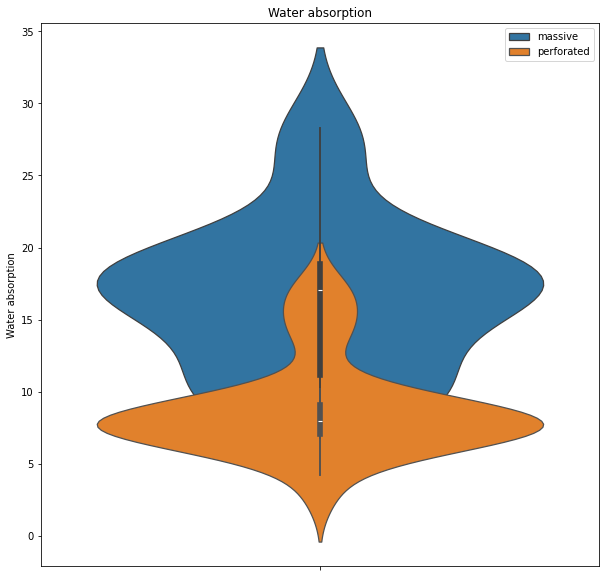

In [22]:
plt.figure(figsize=(10,10))
sns.violinplot(data=solid.iloc[:,4], scale="count", label="massive")
sns.violinplot(data=perf.iloc[:,4], scale="count", label = "perforated")
plt.title("Water absorption")
plt.legend()

Mye større frostmotstand-variasjon blant solid murstein.
Betydelig forskjell på vannabsorpsjon blant de to typene!

C:\Users\marth\AppData\Local\Temp/ipykernel_10072/3929866787.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
C:\Users\marth\AppData\Local\Temp/ipykernel_10072/3929866787.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.


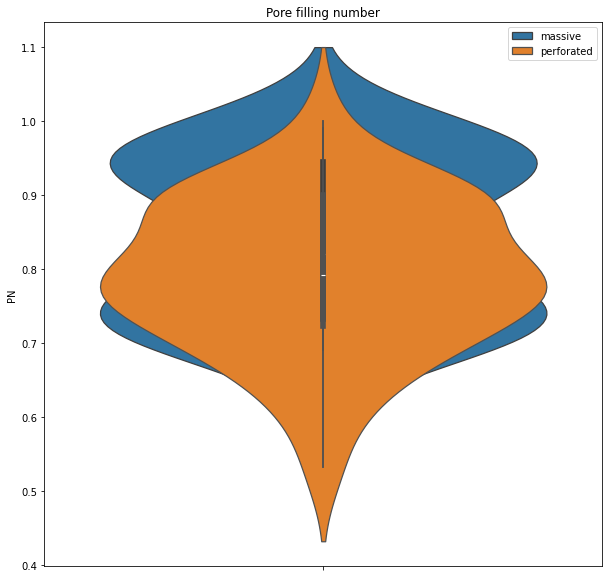

In [23]:
plt.figure(figsize=(10,10))
sns.violinplot(data=solid.iloc[:,5], scale="count", label="massive")
sns.violinplot(data=perf.iloc[:,5], scale="count", label = "perforated")
plt.title("Pore filling number")
plt.legend()